Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

       apple       0.50      0.67      0.57         3
      banana       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

Mean Absolute Error: 33.30199192088033
Root Mean Squared Error: 43.80502188108649


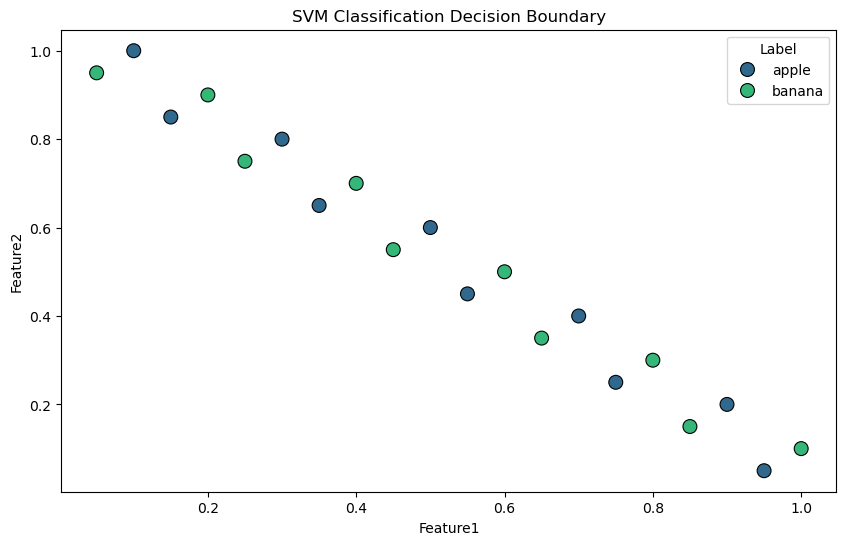

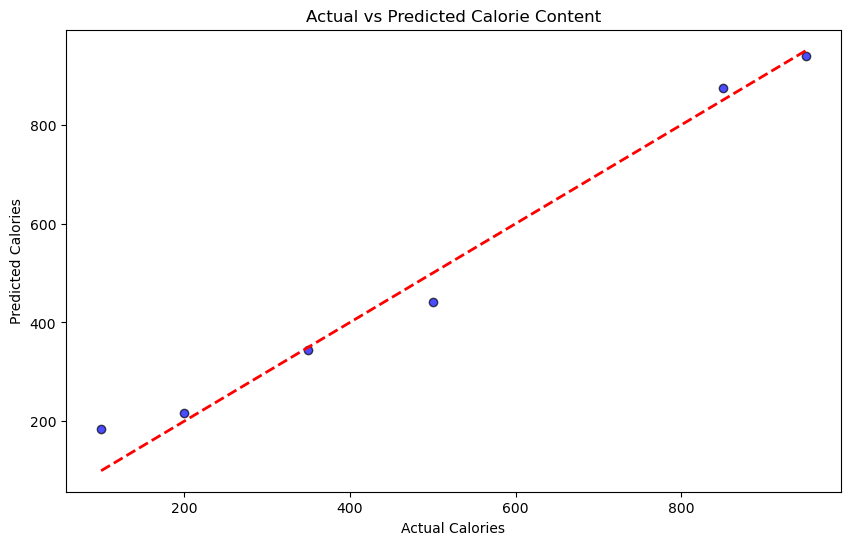

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'Feature1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 0.05],
    'Feature2': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05, 0.95],
    'Calories': [100, 200, 150, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050],
    'Label': ['apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana', 'apple', 'banana']
}
df = pd.DataFrame(data)

# Define Features and Target Variables
X = df[['Feature1', 'Feature2']]
y_class = df['Label']
y_reg = df['Calories']

# Split Data
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42, stratify=y_class)
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

# Train SVM Model for Classification with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_class_train)

# Best model from GridSearch
model_class = grid.best_estimator_
print(f"Best Parameters for SVM: {grid.best_params_}")

# Train Linear Regression Model for Calorie Estimation
model_reg = LinearRegression()
model_reg.fit(X_train, y_reg_train)

# Make Predictions
y_class_pred = model_class.predict(X_test)
y_reg_pred = model_reg.predict(X_test)

# Evaluate Classification Model
accuracy_class = accuracy_score(y_class_test, y_class_pred)
report_class = classification_report(y_class_test, y_class_pred, zero_division=1)  # Prevent undefined metric warnings
print(f'Classification Accuracy: {accuracy_class}')
print(f'Classification Report:\n{report_class}')

# Evaluate Regression Model
mae_reg = mean_absolute_error(y_reg_test, y_reg_pred)
rmse_reg = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
print(f'Mean Absolute Error: {mae_reg}')
print(f'Root Mean Squared Error: {rmse_reg}')

# Visualize Results

# 1. Classification Decision Boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='viridis', s=100, edgecolor='k')
plt.title('SVM Classification Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Label')
plt.show()

# 2. Actual vs Predicted Calorie Content
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], 'r--', lw=2)  # Line of best fit
plt.title('Actual vs Predicted Calorie Content')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()